<a href="https://colab.research.google.com/github/AMORE76/-Python-Data-Science-Numpy-Matplotlib-Scikit-learn/blob/main/%D0%9C%D0%B0%D1%82%D1%81%D1%82%D0%B0%D1%82_%D0%A3%D1%80%D0%BE%D0%BA_8_%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Тема работы: "Применение парной линейной регрессии для статистического анализа зависимости стоимости квартиры от ее площади".

## Проектная работа по курсу "Теория вероятностей и математическая статистика"

Часто в статистике анализируют **многомерные** наблюдения, то есть имеющие несколько признаков.

Для этого применяют многомерный статистический анализ. Особенно часто его используют, когда нужно:

* изучить зависимость между признаками;
* классифицировать объекты с множеством признаков;
* понизить размерность пространства признаков (если их слишком много и нет возможности отсеять часть).

Возьмем исходные данные для расчета параметров из данных популярного портала недвижимости по городу Санкт-Петербург. Это будут значения площадей квартир в квадратных метрах (массив $x$) и соответствующие цены на эти квартиры в миллионах рублей (массив $y$), приведеннные для 12 наблюдений.

Построим уравнение парной линейной регрессии, оценим ее точность и адекватность.

Создадим массивы $x$ и $y$:

In [ ]:
import numpy as np

# Количество наблюдений
n = 12

x = np.array([24.30, 34.00, 36.00, 35.60, 35.00, 34.30, 39.10, 34.40, 41.40, 44.20, 33.20, 42.80], dtype=np.float64)
y = np.array([6.00,	6.95,	7.20,	7.60,	7.70,	7.90,	8.50,	8.70,	8.70,	8.80,	7.40,	8.00], dtype=np.float64)

Для нахождения коэффициентов регрессии $a$ и $b$ воспользуемся формулами:

In [ ]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
b

0.12719796841382447

In [ ]:
a = np.mean(y) - b * np.mean(x)
a

3.1839935264896706

Итак, уравнение регрессии имеет вид (коэффициенты округлены до тысячных):

$$y = 3.184 + 0.127 \cdot x$$

С увеличением площади квартиры на 1 квадратный метр цена квартиры возрастает на 0.127 млн рублей (127 000 рублей).

Найдем коэффициент корреляции $r$ с помощью коэффициента $b$ и средних квадратического отклонения, посчитанного для массивов $x$ и $y$:

In [ ]:
r = b * np.std(x) / np.std(y)
r

0.8038481708630796

Найдем коэффициент детерминации $R^2$:

In [ ]:
R2 = r**2
R2

0.6461718817999188

Это означает, что 64.6% вариации цены на квартиру ($y$) объясняется вариацией фактора $x$ — площади квартиры.

С помощью этого уравнения регрессии посчитаем значения, предсказанные моделью значения цен на квартиры:

In [ ]:
y_pred = a + b * x
y_pred

array([6.27490416, 7.50872445, 7.76312039, 7.7122412 , 7.63592242,
       7.54688384, 8.15743409, 7.55960364, 8.44998942, 8.80614373,
       7.40696608, 8.62806657])

Качество модели определим с помощью средней ошибки аппроксимации $\overline {A}$:

In [ ]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean

4.603964327318141

Так как $\overline {A}$ равна 4.6%, что не превышает 8-10 %, модель хорошо описывает эмпирические данные. Для оценки значимости 

уравнения регрессии воспользуемся F-критерием Фишера. Найдем фактическое значение $F$-критерия ($F_{факт}$):

In [ ]:
F_fact = (r**2 * (n - 2)) / (1 - r**2)
F_fact

18.262310103758466

При 5 % уровне значимости и степенях свободы $k_1 = 1$ и $k_2 = 12 - 2 = 10$ табличное значение критерия: $F_{кр} = 4.96$.

Так как $F_{факт} = 18.26 > F_{кр} = 4.96$, уравнение регрессии статистически значимо.

Для оценки статистической значимости параметров регрессии воспользуемся $t$-статистикой Стьюдента и также рассчитаем 

доверительные интервалы каждого из показателей. При $df = n - 2 = 12 - 2 = 10$ и $\alpha = 0.05$ получим

(см. <a href='https://statpsy.ru/t-student/t-test-tablica/'>Таблицу критических значений t-критерия Стьюдента</a>):

$$t_{кр} = 2.228$$

Определим стандартную ошибку $S_{ост}$ (переменная **s_residual**) и случайные ошибки $m_a, \; m_b$:

In [ ]:
s_residual = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))
m_a = s_residual * np.sqrt(np.sum(x ** 2)) / (n * np.std(x))
m_b = s_residual / (np.std(x) * np.sqrt(n))

print('s_residual = {}\nm_a = {}\nm_b = {}'.format(s_residual, m_a, m_b))

s_residual = 0.5216473302464308
m_a = 1.0877104200592687
m_b = 0.029764755426405557


Вычислим наблюдаемые значения критерия $t_a$ и $t_b$:

In [ ]:
t_a = a / m_a
t_a

2.9272437477579527

In [ ]:
t_b = b / m_b
t_b

4.273442418444394

Фактические значения t-статистики больше табличного значения:

$$t_a = 2.93 > t_{кр} = 2.228, \; t_b = 4.27 > t_{кр} = 2.228,$$

поэтому параметры $a$ и $b$ не случайно отличаются от нуля, то есть они статистически значимы.

Рассчитаем доверительные интервалы для параметров регрессии $a$ и $b$. Для этого определим предельную ошибку для каждого показателя ($\Delta_a$ и $\Delta_b$),

используя значение $t_{кр}$, равное 2.228 (переменная **t_cr**):

In [ ]:
t_cr = 2.228

In [ ]:
delta_a = t_cr * m_a
delta_a

2.4234188158920507

In [ ]:
delta_b = t_cr * m_b
delta_b

0.06631587509003159

Найдем границы доверительных интервалов $\gamma_{a_{min}}, \gamma_{a_{max}}, \gamma_{b_{min}}, \gamma_{b_{max}}$:

In [ ]:
gamma_a_min = a - delta_a
gamma_a_min

0.7605747105976199

In [ ]:
gamma_a_max = a + delta_a
gamma_a_max

5.607412342381721

In [ ]:
gamma_b_min = b - delta_b
gamma_b_min

0.06088209332379288

In [ ]:
gamma_b_max = b + delta_b
gamma_b_max

0.19351384350385606

**Приходим к выводу о том, что с вероятностью $p = 1 - \alpha = 0.95$ параметры $a$ и $b$, находясь в указанных границах, 
являются статистически значимыми и отличны от нуля.**

Поместим исходные и предсказанные данные в датафрейм **df**:

In [ ]:
import pandas as pd

df = pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred}, columns=['x', 'y', 'y_pred'])
df

,x,y,y_pred
0,24.3,6.00,6.274904
1,34.0,6.95,7.508724
2,36.0,7.20,7.763120
3,35.6,7.60,7.712241
4,35.0,7.70,7.635922
5,34.3,7.90,7.546884
6,39.1,8.50,8.157434
7,34.4,8.70,7.559604
8,41.4,8.70,8.449989
9,44.2,8.80,8.806144


Отсортируем значения по полю **x**:

In [ ]:
df = df.sort_values('x')
df

,x,y,y_pred
0,24.3,6.00,6.274904
10,33.2,7.40,7.406966
1,34.0,6.95,7.508724
5,34.3,7.90,7.546884
7,34.4,8.70,7.559604
4,35.0,7.70,7.635922
3,35.6,7.60,7.712241
2,36.0,7.20,7.763120
6,39.1,8.50,8.157434
8,41.4,8.70,8.449989


Построим на одном графике исходные данные и теоретическую прямую, построенную по уравнению регрессии. Получим наглядное изображение разброса исходных данных относительно прямой (в том числе для оценки наличия выбросов):

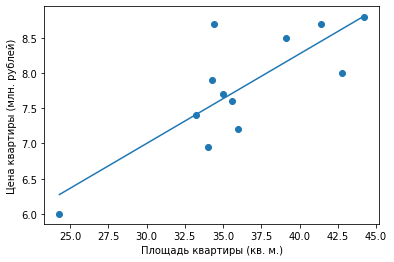

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])
plt.xlabel('Площадь квартиры (кв. м.)')
plt.ylabel('Цена квартиры (млн. рублей)')
plt.show()